In [1]:
#######################
# Zafer Acar          #
# zafer.acar@cern.ch  #
#######################

## Question 1 - Standard Deviation Like a Hipster

In [2]:
Q =[2,3,4,2] # We define our list

In [3]:
total=0
counter=0
for i in Q: #we iterate the list and sum and count how many elements in the list
    total=total+i
    counter=counter+1

In [24]:
total # in Jupyter Notebook we don't need to use print ()

11

In [25]:
counter

4

In [26]:
avg=total/counter

In [27]:
avg

2.75

In [29]:
Q2=[] # we define another list for sum of squares

In [30]:
for i in Q: # we iterate first list subtract the average and square them
    Q2.append((i-avg)**2)

In [10]:
Q2

[0.5625, 0.0625, 1.5625, 0.5625]

In [11]:
sumofsquares=0
for i in Q2:
    sumofsquares=sumofsquares+i

In [12]:
sumofsquares

2.75

In [31]:
std=(sumofsquares/counter)**0.5 #finally we calculate the standart deviation

In [32]:
std

0.82915619758885

## Question 2 - Sorting Like a Hipster

In [15]:
mylist=[71, 51, 32, 62, 84, 109, 43, 92, 72, 41, 102, 80, 72, 69, 46, 94, 52, 95, 90, 72, 63, 70, 34, 80, 78, 34, 31, 37,
26, 41, 42, 107, 33, 108, 108, 75, 66, 23, 90, 53, 24, 70, 26, 41, 93, 24, 71, 39, 48, 66, 97, 107, 77, 71, 67, 39, 38,
107, 96, 92, 84, 46, 60, 95, 87, 90, 92, 63, 78, 78, 84, 107, 70, 108, 32, 36, 93, 108, 49, 72, 56, 43, 30, 56, 51, 97, 45,
92, 40, 43, 49, 83, 98, 28, 99, 97, 102, 89, 58, 87]

In [16]:
for i in range(len(mylist)):
    for j in range(i + 1, len(mylist)):
        if mylist[i] > mylist[j]:
               mylist[i], mylist[j] = mylist[j], mylist[i]

In [17]:
mylist

[23,
 24,
 24,
 26,
 26,
 28,
 30,
 31,
 32,
 32,
 33,
 34,
 34,
 36,
 37,
 38,
 39,
 39,
 40,
 41,
 41,
 41,
 42,
 43,
 43,
 43,
 45,
 46,
 46,
 48,
 49,
 49,
 51,
 51,
 52,
 53,
 56,
 56,
 58,
 60,
 62,
 63,
 63,
 66,
 66,
 67,
 69,
 70,
 70,
 70,
 71,
 71,
 71,
 72,
 72,
 72,
 72,
 75,
 77,
 78,
 78,
 78,
 80,
 80,
 83,
 84,
 84,
 84,
 87,
 87,
 89,
 90,
 90,
 90,
 92,
 92,
 92,
 92,
 93,
 93,
 94,
 95,
 95,
 96,
 97,
 97,
 97,
 98,
 99,
 102,
 102,
 107,
 107,
 107,
 107,
 108,
 108,
 108,
 108,
 109]

## Question 3 - Dataset Correlation Like a Hipster

In [116]:
#Easy Solution
import pandas as pd

In [117]:
df=pd.read_fwf("random_x_y_pairs.txt", names=['x','y'], header=None)

In [118]:
df.describe() #.describe() gives mean, and standart deviation of each columns

,x,y
count,1000.000000,1000.000000
mean,-0.042437,-0.080817
std,2.285450,2.236673
min,-7.114000,-7.607400
25%,-1.525500,-1.569475
50%,-0.060250,-0.151950
75%,1.435600,1.410350
max,8.311300,6.322300


In [119]:
df.corr() # .corr gives Pearson Correlation Matrix for x and y

,x,y
x,1.000000,0.602885
y,0.602885,1.000000


In [120]:
# Even though we found the answer, Now We will do the same thing like a hipster

In [121]:
# We copied the code from question 1 and put in a function
def avg_std(list):
    total=0
    counter=0
    for i in list: #we iterate the list and sum and count how many elements in the list
        total=total+float(i)
        counter=counter+1
    
    avg=total/counter
    list2=[]
    for i in list: # we iterate first list subtract the average and square them
        list2.append((float(i)-avg)**2)
    sumofsquares=0
    for i in list2:
        sumofsquares=sumofsquares+i
    std=(sumofsquares/counter)**0.5
    return avg, std

In [131]:
#we read the file line by line
lineList = [line.rstrip('\n') for line in open("random_x_y_pairs.txt")]
xlist=[]
ylist=[]
for line in lineList:
    x,y=line.split() # we split x and y values append to lists
    xlist.append(x)
    ylist.append(y)  

In [123]:
x_avg,x_std=avg_std(xlist)
y_avg,y_std=avg_std(ylist)

In [124]:
x_avg, x_std,y_avg,y_std

(-0.042437299999999956,
 2.284306564837285,
 -0.08081670000000005,
 2.2355545772785583)

In [132]:
# https://pythonfordatascience.org/variance-covariance-correlation/
def corr_coeff(xlist,ylist):
    x_avg,x_std=avg_std(xlist)
    y_avg,y_std=avg_std(ylist)
    
    diff=[]
    
    for i,j in zip(xlist,ylist):
        diff.append((float(i)-x_avg)*(float(j)-y_avg))
    
    sum2=0
    counter=0
    
    for i in diff:
        sum2=sum2+i
        counter=counter+1
    #We calculate the covariance 
    covariance=sum2/(counter)
    # Finally we calculate tho correlation coefficient
    coeff=covariance/(x_std*y_std)
    return coeff
    

In [133]:
corr_coeff(xlist,ylist)

0.6028849931792001

## Question 4 - Numerical Integration Like a Hipster

In [136]:
N=[10,50,100,200]

In [137]:
# Analytic Solution

In [140]:
a=1
b=9
for i in N:
    area=(1/(i-1))*(b**(i-1)-a**(i-1))
    print("Area for N=",i," is ", area)
    

Area for N= 10  is  43046720.88888889
Area for N= 50  is  1.1686565095963976e+45
Area for N= 100  is  2.981077316227551e+92
Area for N= 200  is  3.939184315273776e+187


In [142]:
#Now we calculate with numerically
def fx(x):
    return 3*x**3 - 4*x**2 + 3.2198*x


In [144]:
for i in N:
    area=[]
    dx=(b-a)/i
    minv=a
    maxv=b
    while (minv<=maxv):
        area.append(fx(minv)*dx)
        minv=minv+dx
    
    totalarea=0
    for j in area:
        totalarea=totalarea+j
    print("Area for N=",i," is ", totalarea)

Area for N= 10  is  4870.7912
Area for N= 50  is  3928.3441280000065
Area for N= 100  is  4002.8848640000097
Area for N= 200  is  4116.096760000002


## BONUS - Fitting a Line

In [146]:
x=[1,2.2,3,3.9,4.8]
y=[0.5,1.1,1.3,2.1,2.6]

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

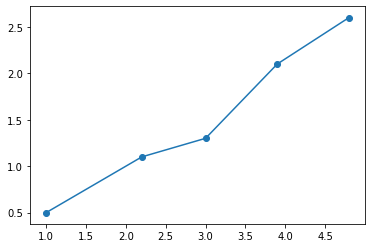

In [152]:
plt.scatter(x,y)
plt.plot(x,y);

In [149]:
m,b = np.polyfit(x, y, 1)

In [150]:
m

0.5573204419889503

In [151]:
b

-0.1408149171270716